In [1]:
import pandas as pd
import numpy as np


In [2]:
dftest = pd.read_csv(r'C:\Users\ThomasHo\Desktop\FPY\fypdata\82data\dftest82_2.csv')

dftrain = pd.read_csv(r'C:\Users\ThomasHo\Desktop\FPY\fypdata\82data\dftrain82_2.csv')


Epoch 1/100
3/3 [==============================] - 1s 131ms/step - loss: 55.6331 - accuracy: 0.3684 - val_loss: 48.3011 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 46.1357 - accuracy: 0.5921 - val_loss: 39.8370 - val_accuracy: 0.6500
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 37.9962 - accuracy: 0.5395 - val_loss: 32.6638 - val_accuracy: 0.6500
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 31.1214 - accuracy: 0.5526 - val_loss: 26.6705 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 25.3961 - accuracy: 0.5658 - val_loss: 21.7300 - val_accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 20.6916 - accuracy: 0.5658 - val_loss: 17.7122 - val_accuracy: 0.6500
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 16.8774 - accuracy: 0.5526 - val_loss: 14.4839 - val_accuracy: 0.6500
Epoch

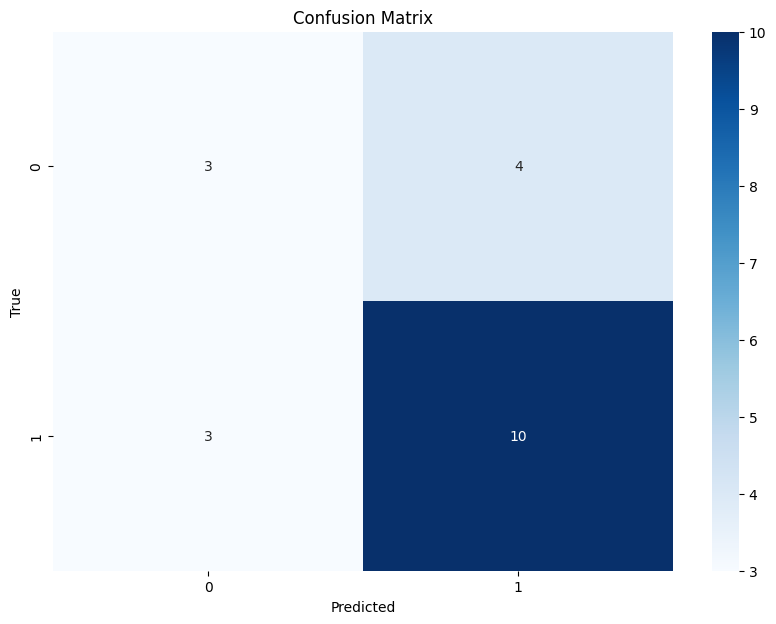

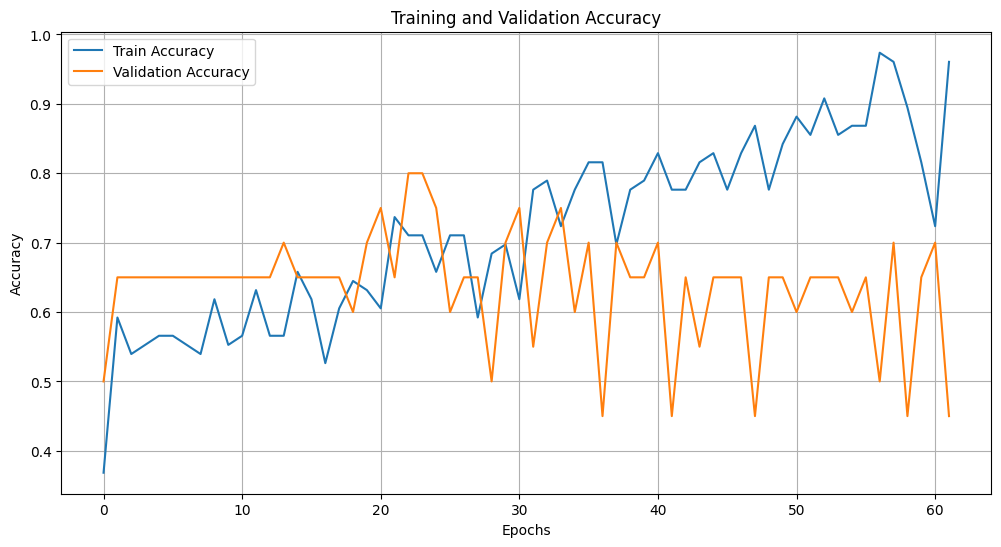

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix
import seaborn as sns  # 确保导入 seaborn

# 读取数据
df = dftrain  # Replace with your actual DataFrame

# 分离标签和特征
labels = df.iloc[:, 0].values  # 假设第一列是标签
features = df.iloc[:, 1:]       # 其余列是特征

# 确保特征仅包含数值类型（如果需要）
features = features.select_dtypes(include=[np.number])

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# 将标签转换为分类格式
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Reshape input to be 3D: (samples, timesteps, features)
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)  # Reshape for 1D Conv
X_val = X_val.values.reshape(-1, X_val.shape[1], 1)  # Reshape for 1D Conv

# 定义改进后的深度学习模型
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1], 1)),  # Adjust input shape for Conv1D
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(8, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 设置早停，监控验证集的损失
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
#history = model.fit(X_train, y_train, epochs=75, batch_size=16, validation_data=(X_val, y_val))

# 在验证集上进行预测
val_predictions_proba = model.predict(X_val)
val_predictions = np.argmax(val_predictions_proba, axis=1)  # 获取预测的类别
y_val_labels = np.argmax(y_val, axis=1)  # 使用验证集的标签

# 输出分类报告
print(classification_report(y_val_labels, val_predictions, target_names=["Placebo (0)", "POM (1)"]))

# 输出结果
accuracy = accuracy_score(y_val_labels, val_predictions)
precision = precision_score(y_val_labels, val_predictions, average='weighted', zero_division=0)
recall = recall_score(y_val_labels, val_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_val_labels, val_predictions, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 绘制混淆矩阵
cm = confusion_matrix(y_val_labels, val_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 可视化训练过程
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# 绘制训练历史
plot_training_history(history)

# 保存模型
model.save(r'C:\Users\ThomasHo\Desktop\FPY\fypdata\82data\df2cnn_model.keras')

In [4]:
#test

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# 加载训练好的模型
model = tf.keras.models.load_model(r'C:\Users\ThomasHo\Desktop\FPY\fypdata\82data\df2cnn_model.keras')

# 读取测试数据集
df_test = dftest  # 请替换为您的测试数据集路径

# 分离特征和标签
test_labels = df_test.iloc[:, 0].values  # 假设第一列是标签
features_test = df_test.iloc[:, 1:].values  # 其余列是特征

# 重塑测试数据以适应模型输入
num_features = features_test.shape[1]  # 获取特征数量
features_test = features_test.reshape(-1, num_features, 1)  # 重塑为 (样本数, 特征数, 1)

# 进行预测
predictions = model.predict(features_test)
predicted_classes = np.argmax(predictions, axis=1)  # 获取预测的类别

# 确保 labels 是一维的
if len(test_labels.shape) > 1:
    test_labels = test_labels.flatten()

# 计算准确率、精确率、召回率和 F1 分数
accuracy = accuracy_score(test_labels, predicted_classes)
precision = precision_score(test_labels, predicted_classes, average='weighted', zero_division=0)
recall = recall_score(test_labels, predicted_classes, average='weighted', zero_division=0)
f1 = f1_score(test_labels, predicted_classes, average='weighted', zero_division=0)

# 生成分类报告
report = classification_report(test_labels, predicted_classes, output_dict=True)

# 统计每个类别的结果
class_report_df = pd.DataFrame(report).transpose()

# 自定义类名
class_report_df.index = ['Placebo (0)', 'POM (1)', 'accuracy', 'macro avg', 'weighted avg']

# 输出结果
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}\n")

# 打印分类报告
print(class_report_df)

# 输出详细的预测结果
results_df = pd.DataFrame({
    'True Label': test_labels,
    'Predicted Label': predicted_classes
})
print(results_df)  

1/1 [==============================] - 0s 103ms/step
Test Accuracy: 0.5417
Precision: 0.5542
Recall: 0.5417
F1 Score: 0.5393

              precision    recall  f1-score    support
Placebo (0)    0.500000  0.636364  0.560000  11.000000
POM (1)        0.600000  0.461538  0.521739  13.000000
accuracy       0.541667  0.541667  0.541667   0.541667
macro avg      0.550000  0.548951  0.540870  24.000000
weighted avg   0.554167  0.541667  0.539275  24.000000
    True Label  Predicted Label
0            1                1
1            1                0
2            1                0
3            0                0
4            1                0
5            1                0
6            1                0
7            1                1
8            0                0
9            0                1
10           0                0
11           1                1
12           0                0
13           1                0
14           1                0
15           1                1
